Regression is a statistical method used to establish a relationship between one or more independent variables (also known as predictors, features, or inputs) and a dependent variable (also known as the outcome, target, or response). The main goal of regression analysis is to predict the value of the dependent variable based on the values of the independent variables.

Regression models can be used for various purposes, such as forecasting future trends, understanding the relationships between variables, and making predictions. Regression analysis is widely used in various fields such as economics, finance, psychology, engineering, and social sciences.

There are several types of regression models, including:

 - Simple linear regression: 
    This is the simplest form of regression, where one independent variable is used to predict a dependent variable. It assumes that there is a linear relationship between the two variables.

- Multiple linear regression:
    This type of regression involves two or more independent variables to predict a dependent variable. It is useful when there are multiple factors that can affect the outcome.

- Polynomial regression:
    This type of regression involves fitting a polynomial equation to the data. It is useful when the relationship between the variables is not linear.

- Logistic regression:
    This type of regression is used when the dependent variable is categorical. It is used to predict the probability of an event occurring.

- Ridge regression:
    This is a type of regression that is used when there is multicollinearity in the data. It adds a penalty term to the regression equation to reduce the impact of correlated variables.

Regression analysis involves several steps, including data collection, data cleaning, variable selection, model building, model validation, and interpretation of results. The accuracy of the regression model can be measured using various metrics such as R-squared, Mean squared error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

In summary, regression is a statistical method used to establish a relationship between independent variables and a dependent variable to make predictions and understand the relationships between variables.

# **DataSet**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [84]:
diabetes = load_diabetes(scaled=True)
dataset = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

Variable descriptions on the diabetes dataset from scikit-learn

- $age$     = Age in years
- $sex$     = Sex
- $bmi$     = body mass index
- $bp$      = average blood pressure
- $s1$      = tc, total serum cholesterol
- $s2$      = ldl, low-density lipoproteins
- $s3$      = hdl, high-density lipoproteins
- $s4$      = tch, total cholesterol / HDL
- $s5$      = ltg, possibly log of serum triglycerides level
- $s6$      = glu, blood sugar level
- $target$  = Quantitative measure of disease progression. (floating poin 25 - 346)

## *Data*

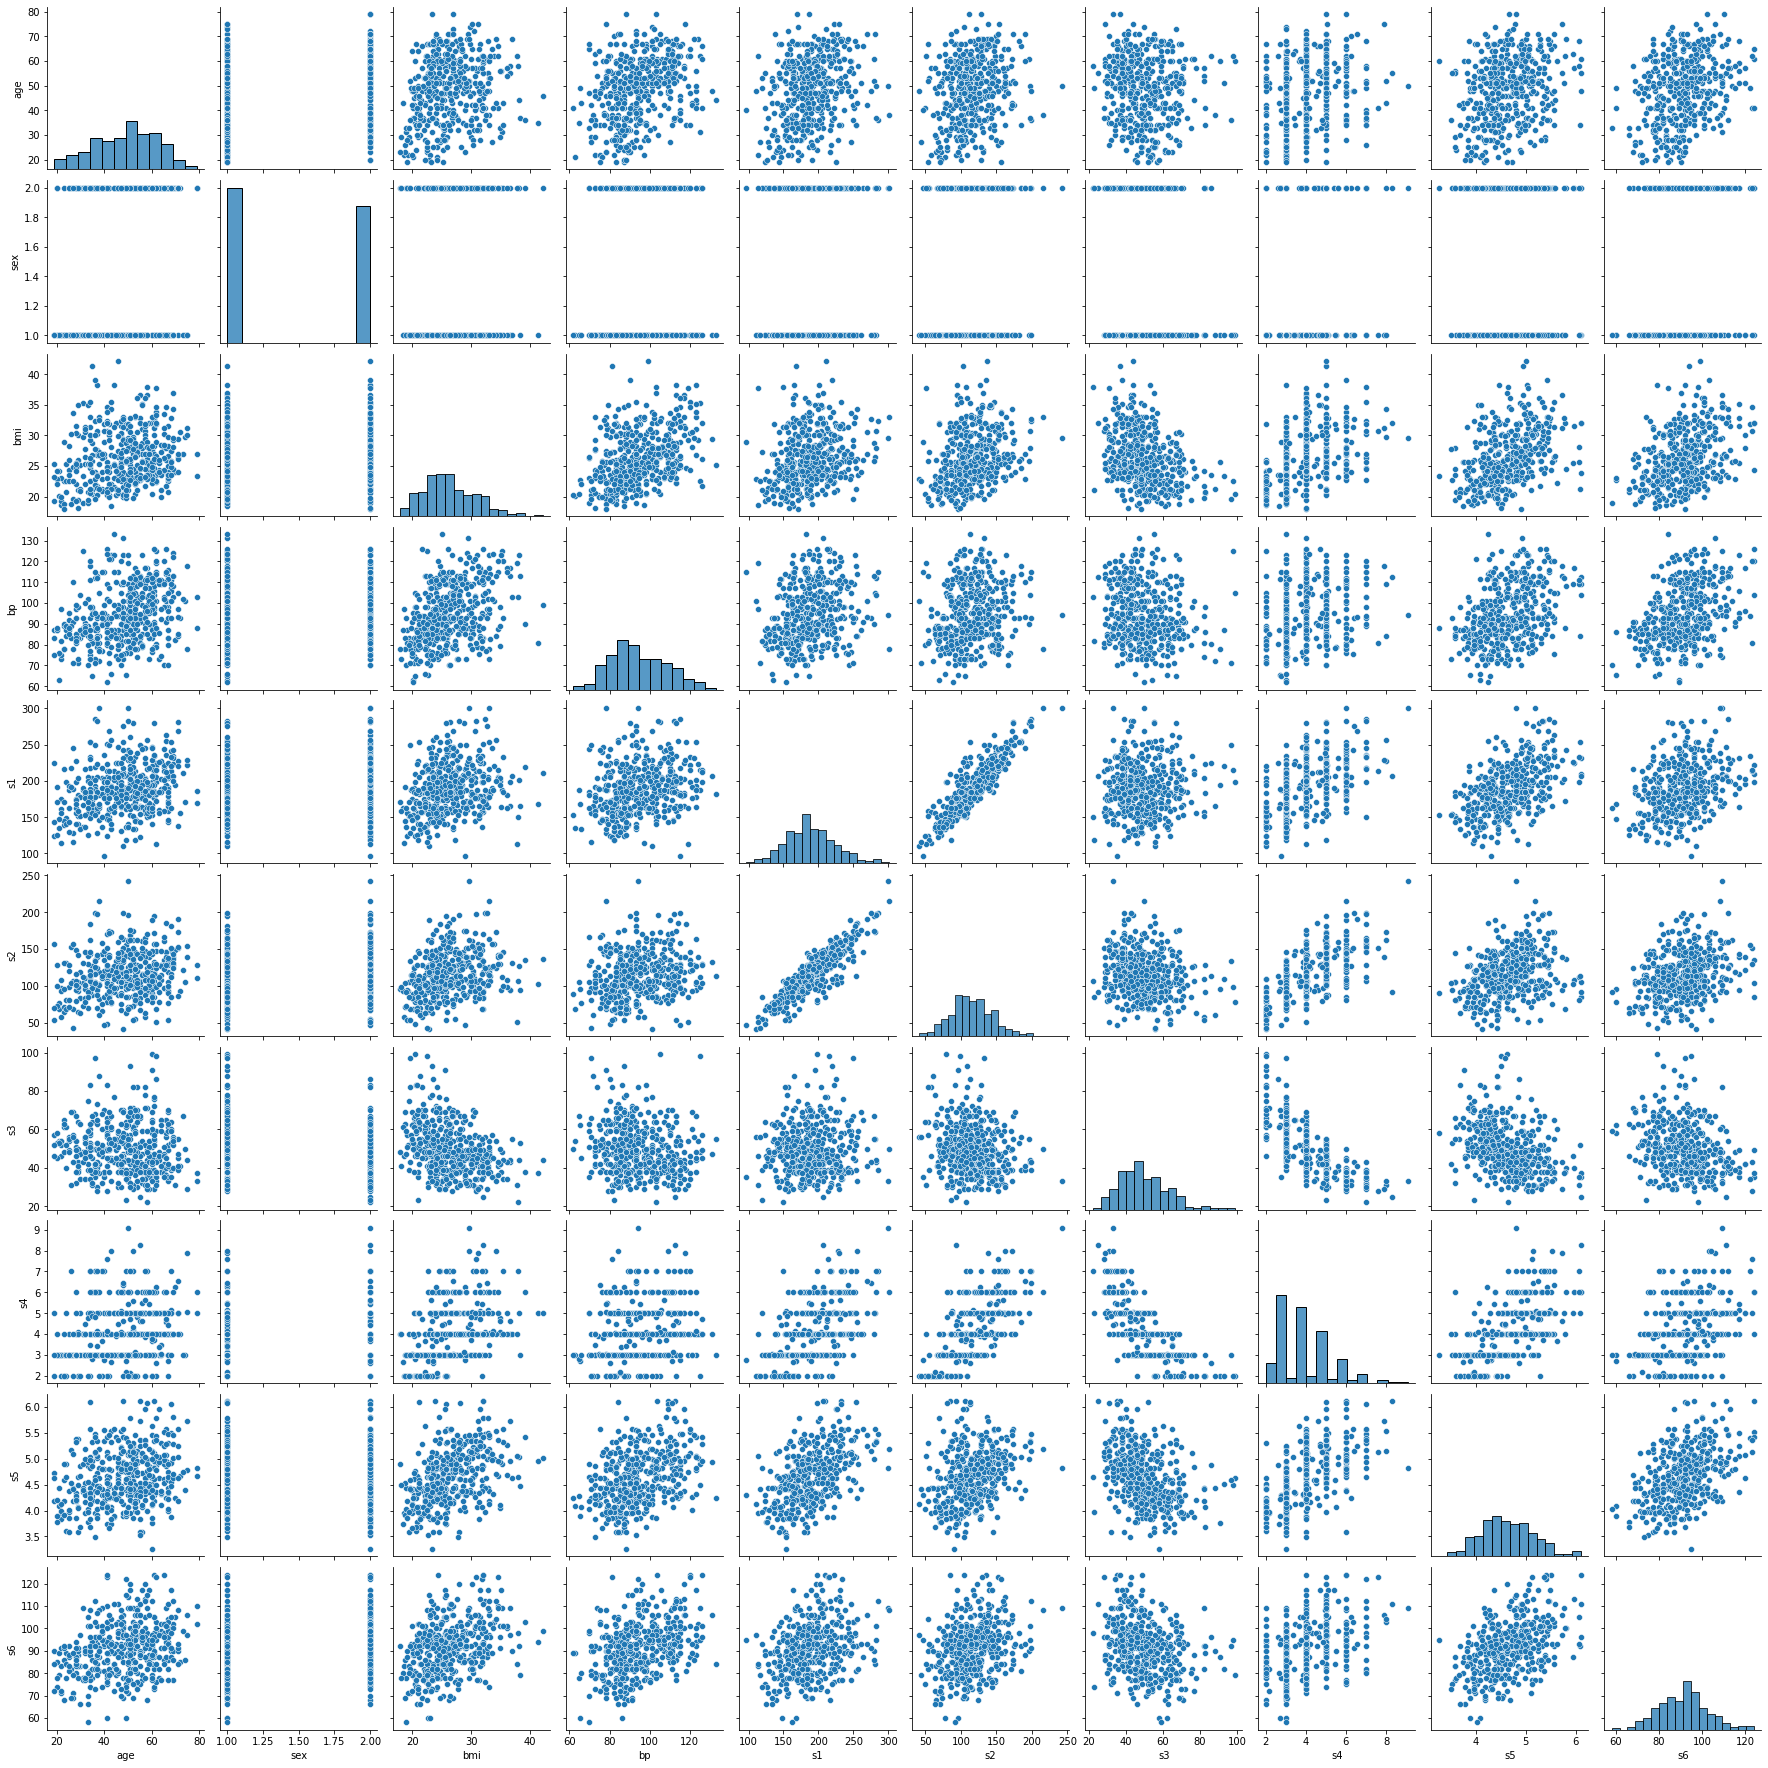

In [34]:
sns.pairplot(data = dataset)

## *Train and Test Split*

In [87]:
X_train, X_test, y_train, y_test = train_test_split(dataset, diabetes.target, test_size=0.2, random_state=42)

In [88]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (353, 10) (353,)
Testing set shape: (89, 10) (89,)


# **Linear Regression**

Linear regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features. The goal of linear regression is to find the best linear relationship between the input features and the target variable.

The linear regression model can be represented mathematically as:

y = β0 + β1x1 + β2x2 + ... + βpxp + ε

where:
- y is the target variable
- x1, x2, ..., xp are the input features
- β0, β1, β2, ..., βp are the coefficients of the linear model
- ε is the error term or residual, which represents the difference between the predicted and actual values of y

The coefficients β0, β1, β2, ..., βp are estimated using a method called least squares. The goal of least squares is to minimize the sum of squared errors between the predicted and actual values of y:

min Σi=1 to n (yi - ŷi)^2

where:
- n is the number of observations in the dataset
- yi is the actual value of the target variable for the ith observation
- ŷi is the predicted value of the target variable for the ith observation

The least squares solution for the coefficients β0, β1, β2, ..., βp is:

β = (X^T X)^-1 X^T y

where:
- X is the matrix of input features
- y is the vector of target variable values
- (X^T X)^-1 is the inverse of the matrix product of X^T and X

Once the coefficients β0, β1, β2, ..., βp are estimated, the linear regression model can be used to predict the value of the target variable for new observations based on their input features.

In summary, linear regression is a simple but powerful algorithm for predicting a continuous target variable based on one or more input features. It finds the best linear relationship between the input features and the target variable by minimizing the sum of squared errors between the predicted and actual values. The least squares method is used to estimate the coefficients of the linear model, which can then be used to predict the target variable for new observation


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score, r2_score
from scipy.stats import pearsonr

In [55]:
def evaluate_regression(y_true, y_pred):
    # Calculate the metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

    # Print the results
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'sMAPE: {smape:.2f}%')

    # Evaluate the model using the regression model evaluation from sklearn
    print(f'Explained Variance Score: {explained_variance_score(y_true, y_pred):.2f}')
    print(f'R^2 Score: {r2_score(y_true, y_pred):.2f}')
    print(f'Pearson Correlation Coefficient: {pearsonr(y_true, y_pred)[0]:.2f}')

In [89]:
linear_model = LinearRegression().fit(X_train, y_train)

In [90]:
y_pred = linear_model.predict(X_test)
evaluate_regression(y_test, y_pred)

MSE: 2900.19
RMSE: 53.85
MAE: 42.79
MAPE: 37.50%
sMAPE: 31.70%
Explained Variance Score: 0.46
R^2 Score: 0.45
Pearson Correlation Coefficient: 0.68


# **Polynomial Regression**

Linear regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features. The goal of linear regression is to find the best linear relationship between the input features and the target variable.

The linear regression model can be represented mathematically as:

y = β0 + β1x1 + β2x2 + ... + βpxp + ε

where:
- y is the target variable
- x1, x2, ..., xp are the input features
- β0, β1, β2, ..., βp are the coefficients of the linear model
- ε is the error term or residual, which represents the difference between the predicted and actual values of y

The coefficients β0, β1, β2, ..., βp are estimated using a method called least squares. The goal of least squares is to minimize the sum of squared errors between the predicted and actual values of y:

min Σi=1 to n (yi - ŷi)^2

where:
- n is the number of observations in the dataset
- yi is the actual value of the target variable for the ith observation
- ŷi is the predicted value of the target variable for the ith observation

The least squares solution for the coefficients β0, β1, β2, ..., βp is:

β = (X^T X)^-1 X^T y

where:
- X is the matrix of input features
- y is the vector of target variable values
- (X^T X)^-1 is the inverse of the matrix product of X^T and X

Once the coefficients β0, β1, β2, ..., βp are estimated, the linear regression model can be used to predict the value of the target variable for new observations based on their input features.

In summary, linear regression is a simple but powerful algorithm for predicting a continuous target variable based on one or more input features. It finds the best linear relationship between the input features and the target variable by minimizing the sum of squared errors between the predicted and actual values. The least squares method is used to estimate the coefficients of the linear model, which can then be used to predict the target variable for new observations.


In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

LinearRegression()

In [92]:
y_pred = poly_model.predict(poly.fit_transform(X_test))
evaluate_regression(y_test, y_pred)

MSE: 3096.03
RMSE: 55.64
MAE: 43.58
MAPE: 38.29%
sMAPE: 31.36%
Explained Variance Score: 0.42
R^2 Score: 0.42
Pearson Correlation Coefficient: 0.67


# **Ridge Regression**

Ridge regression is a type of linear regression that uses L2 regularization to prevent overfitting. It adds a penalty term to the least squares objective function to constrain the magnitude of the coefficients.

The Ridge regression model can be represented mathematically as:

y = β0 + β1x1 + β2x2 + ... + βpxp + ε

where:
- y is the target variable
- x1, x2, ..., xp are the input features
- β0, β1, β2, ..., βp are the coefficients of the linear model
- ε is the error term or residual, which represents the difference between the predicted and actual values of y

The Ridge regression model adds a penalty term to the least squares objective function. The goal is to minimize the sum of squared errors between the predicted and actual values of y, subject to a constraint on the magnitude of the coefficients:

min Σi=1 to n (yi - ŷi)^2 + αΣj=1 to p βj^2

where:
- n is the number of observations in the dataset
- yi is the actual value of the target variable for the ith observation
- ŷi is the predicted value of the target variable for the ith observation
- α is the regularization parameter, which determines the strength of the penalty term

The Ridge regression coefficients β0, β1, β2, ..., βp are estimated using a method called Ridge regression, which is a modification of least squares. The Ridge regression solution is:

β = (X^T X + αI)^-1 X^T y

where:
- X is the matrix of input features
- y is the vector of target variable values
- I is the identity matrix
- (X^T X + αI)^-1 is the inverse of the matrix sum of X^T and X and the product of α and I

Once the coefficients β0, β1, β2, ..., βp are estimated, the Ridge regression model can be used to predict the value of the target variable for new observations based on their input features.

In summary, Ridge regression is a type of linear regression that uses L2 regularization to prevent overfitting. It adds a penalty term to the least squares objective function to constrain the magnitude of the coefficients. The Ridge regression coefficients are estimated using a method called Ridge regression, and the regularization parameter α determines the strength of the penalty term. The Ridge regression model can be used to predict the target variable for new observations based on their input features.


In [64]:
from sklearn.linear_model import Ridge

In [93]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [94]:
y_pred = ridge_model.predict(X_test)
evaluate_regression(y_test, y_pred)

MSE: 2917.18
RMSE: 54.01
MAE: 44.42
MAPE: 40.07%
sMAPE: 32.74%
Explained Variance Score: 0.45
R^2 Score: 0.45
Pearson Correlation Coefficient: 0.68


# **Random Forest Regressor**

Random Forest regression is a type of ensemble learning algorithm that combines multiple decision trees to create a more accurate and robust model. It uses the average prediction of multiple trees to reduce the variance and overfitting.

The Random Forest regression model can be represented mathematically as:

y = f1(x) + f2(x) + ... + fm(x) + ε

where:
- y is the target variable
- x is the input feature vector
- fi(x) is the prediction of the ith decision tree
- ε is the error term or residual, which represents the difference between the predicted and actual values of y

The Random Forest regression model consists of a collection of decision trees, where each tree is trained on a random subset of the input features and a random subset of the training data. The trees are combined using a majority vote or average to produce the final prediction.

The Random Forest regression model can be trained using the following steps:
1. Randomly select a subset of the training data.
2. Randomly select a subset of the input features.
3. Train a decision tree on the selected data and features.
4. Repeat steps 1-3 to create a forest of decision trees.
5. Combine the predictions of the decision trees to make the final prediction.

The Random Forest regression model can be used to predict the value of the target variable for new observations based on their input features.

In summary, Random Forest regression is a type of ensemble learning algorithm that combines multiple decision trees to create a more accurate and robust model. The model consists of a forest of decision trees trained on random subsets of the input features and training data. The Random Forest regression model can be used to predict the target variable for new observations based on their input features.


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [96]:
y_pred = rf_regressor.predict(X_test)
evaluate_regression(y_test, y_pred)

MSE: 2952.01
RMSE: 54.33
MAE: 44.05
MAPE: 40.01%
sMAPE: 33.07%
Explained Variance Score: 0.44
R^2 Score: 0.44
Pearson Correlation Coefficient: 0.67


# **XGBoost**

XGBoost (Extreme Gradient Boosting) regression is a type of gradient boosting algorithm that combines multiple weak learners to create a strong and accurate model. It is an ensemble learning algorithm that is known for its speed and performance.

The XGBoost regression model can be represented mathematically as:

y = f(x) + ε

where:
- y is the target variable
- x is the input feature vector
- f(x) is the prediction of the XGBoost model
- ε is the error term or residual, which represents the difference between the predicted and actual values of y

The XGBoost regression model consists of a collection of weak learners, where each learner is trained on the residual errors of the previous learner. The model uses gradient descent to optimize the objective function, which is a combination of the loss function and a regularization term.

The XGBoost regression model can be trained using the following steps:
1. Initialize the model with a constant value (e.g., the mean of the target variable).
2. Train a weak learner on the residual errors of the previous learner.
3. Update the model by adding the prediction of the new learner to the previous prediction.
4. Repeat steps 2-3 to create a sequence of weak learners.
5. Optimize the objective function using gradient descent to find the best values of the hyperparameters.

The XGBoost regression model can be used to predict the value of the target variable for new observations based on their input features.

In summary, XGBoost regression is a type of gradient boosting algorithm that combines multiple weak learners to create a strong and accurate model. The model uses gradient descent to optimize the objective function, which is a combination of the loss function and a regularization term. The XGBoost regression model can be used to predict the target variable for new observations based on their input features.


In [70]:
import xgboost as xgb

In [97]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [98]:
y_pred = xgb_regressor.predict(X_test)
evaluate_regression(y_test, y_pred)

MSE: 3061.36
RMSE: 55.33
MAE: 45.05
MAPE: 40.62%
sMAPE: 33.42%
Explained Variance Score: 0.42
R^2 Score: 0.42
Pearson Correlation Coefficient: 0.66
